In [1]:
import NNMFit
import matplotlib.pyplot as plt


In [2]:
scan_path = "/data/user/tvaneede/GlobalFit/analysis/neha_flavour_ratio/create_dag/output"
analysis_name = "asimov_Poisson_TrackBestFit"

In [3]:
scan_diffuse = NNMFit.utilities.ScanHandler(indir=f"{scan_path}/{analysis_name}/diffuse")
scan_flavor  = NNMFit.utilities.ScanHandler(indir=f"{scan_path}/{analysis_name}/flavor")

In [14]:
drop_unsuccessful = True

x = {}
y = {}
dllh = {}

x["diffuse"], y["diffuse"], dllh["diffuse"] = scan_diffuse.get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)
x["flavor"], y["flavor"], dllh["flavor"] = scan_flavor.get_scan_xydllh(x="astro_nue_ratio",y="astro_nutau_ratio",interpolate=True, drop_unsuccessful=drop_unsuccessful)

Text(0, 0.5, '$\\gamma$')

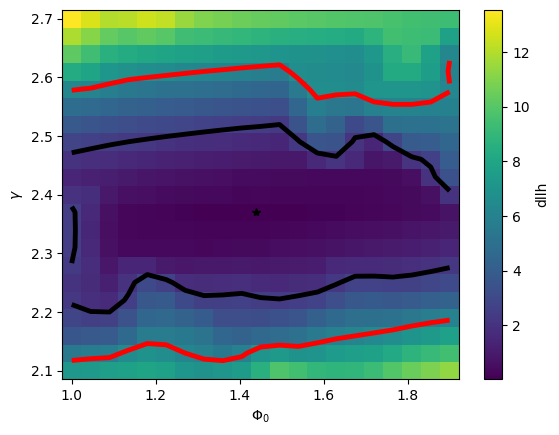

In [15]:
levels = [2.3, 6.18]  # 50% 1sigma (68%), 2sigma (95%)

fig, (ax) = plt.subplots(1, 1)

ax.plot([1.44], [2.37],"*", color="black")

cntr = ax.contour( x["diffuse"], y["diffuse"], dllh["diffuse"], levels=levels, colors=["black", "red"], linewidths=3.5 )

pcm = ax.pcolor(x["diffuse"], y["diffuse"], dllh["diffuse"], cmap='viridis', shading='auto')
fig.colorbar(pcm, ax=ax,label=r"dllh")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

Text(0, 0.5, '$s_{\\nu_{\\tau}}$')

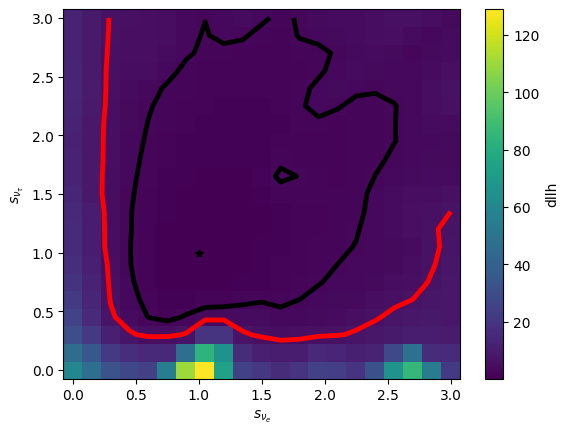

In [17]:
fig_flav, (ax_flav) = plt.subplots(1, 1)

ax_flav.plot([1.], [1.],"*", color="black")

cntr_flav = ax_flav.contour( x["flavor"], y["flavor"], dllh["flavor"], levels=levels, colors=["black", "red"], linewidths=3.5 )

pcm_flav = ax_flav.pcolor(x["flavor"], y["flavor"], dllh["flavor"], cmap='viridis', shading='auto')
fig_flav.colorbar(pcm_flav, ax=ax_flav,label=r"dllh")

ax_flav.set_xlabel(r"$s_{\nu_{e}}$")
ax_flav.set_ylabel(r"$s_{\nu_{\tau}}$")